

**Discussion:** What makes a good model versus a bad model? How can we measure that?

Metrics, or measurements, will allow us to directly compare models that attempt to achieve the same goal.
- Note: Depending on the metric, we might need to be wary of the scale of our $Y$ values!

**The Process of Data Science**
1. Problem Statement
1. Key Metrics
1. Data Gathering
1. Data Cleaning/Munging
1. EDA
1. Modeling
1. Reporting
    - Model evaluation will mostly be used in steps 4 and 5.


### Regression Metrics
We're going to go through six different regression metrics.  However, we will talk most about **MSE** and **$R^2$**.
1. Mean Squared Error
2. Root Mean Squared Error
3. Mean Squared Log Error (briefly)
4. Median Absolute Error
5. $R^2$
6. Adjusted $R^2$ (briefly)

In [8]:
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as linear_model
import pandas as pd

from matplotlib.pyplot import *

# our custom plotting function!
from plot_scores import plot_scores

%matplotlib inline

In [5]:
## Load some data
fires = pd.read_csv("forestfires.csv")

In [6]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
## Build a really AWFUL model here
linear = linear_model.LinearRegression()
X = fires[["FFMC","DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]]
y = fires["area"]


In [10]:
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_hat = linear.predict(X)

In [12]:
mean_squared_error(y, y_hat)
## Score the model

3979.4660161937195

#### Mean Squared Error

$$MSE(\mathbf{y},\hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
> - $n$ = number of observations
> - $y$ = true values
> - $\hat{y}$ = predicted values (from model)
> - $i$ = The $i_{th}$ observation

##### ![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

Goal: Get $MSE$ as close to 0 as possible.

Pros: 
- Very common; part of other calculations.
- Represents average distance squared from the predicted value.

Cons: 
- Can be heavily affected by outliers.
- Not in the original units of $Y$.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

In [ ]:
# Reference scale of target and predicted
fires.describe().T

#### Root Mean Squared Error

$$RMSE(\mathbf{y},\hat{\mathbf{y}}) = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> - $n$ = number of observations
> - $y$ = true values
> - $\hat{y}$ = predicted values (from model)
> - $i$ = The $i_{th}$ observation

Goal: Get $RMSE$ as close to 0 as possible.

Pros: 
- Pretty common; part of other calculations.
- Represents (approximately) average distance from the predicted value.
- In the original units of $Y$.

Cons: 
- Can be heavily affected by outliers.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

There's no documentation, but it should be quite easy to generate the value.

In [16]:
y.sort_values(ascending = False)

238    1090.84
415     746.28
479     278.53
237     212.88
236     200.94
235     196.48
420     185.76
377     174.63
234     154.88
233     105.66
232     103.39
231      95.18
230      88.49
293      86.45
457      82.75
229      71.30
392      70.76
473      70.32
228      64.10
469      61.13
227      58.30
337      56.04
513      54.29
395      51.78
504      49.59
226      49.37
225      48.55
488      46.70
493      43.32
383      42.87
        ...   
358       0.00
297       0.00
357       0.00
348       0.00
347       0.00
342       0.00
341       0.00
336       0.00
335       0.00
334       0.00
328       0.00
327       0.00
326       0.00
325       0.00
318       0.00
316       0.00
315       0.00
313       0.00
312       0.00
310       0.00
309       0.00
308       0.00
305       0.00
304       0.00
303       0.00
302       0.00
300       0.00
299       0.00
298       0.00
0         0.00
Name: area, Length: 517, dtype: float64

In [13]:
np.sqrt(mean_squared_error(y, y_hat))

63.0830089342108

#### Mean Squared Log Error
$$MSLE = \frac{1}{n}\sum_{i=1}^n\left(\log(\hat{y_i} + 1) - log(y_i + 1)\right) ^ 2$$

> Note: $\log(\cdot)$ in this case refers to the natural logarithm or the logarithm with base $e \approx 2.71828$. 
> - $n$ = number of observations
> - $y$ = true values
> - $\hat{y}$ = predicted values (from model)
> - $i$ = The $i_{th}$ observation

Goal: Get $MSLE$ as close to 0 as possible.

Pros: 
- If predicted and observed values are both large, their difference is likely going to be large as well. The logarithm helps to account for that scale.

Cons: 
- Not in the original values of $Y$.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)
- $\log(0)$ is not defined.

> **From scikit-learn docs**
>
> "This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc. Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate."
> [Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error)

#### Median (and Mean) Absolute Error

$$MedAE(\mathbf{y},\hat{\mathbf{y}}) = \text{median}\left(\left|y_1-\hat{y}_1\right|,\ldots ,\left|y_n-\hat{y}_n\right|\right)$$


Goal: Get $MedAE$ as close to 0 as possible.

Pros: 
- Represents median distance from the predicted value.
- In the original units of $Y$. 
- Is not heavily affected by outliers.

Cons: 
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

In [17]:
# Median absolute error
from sklearn.metrics import median_absolute_error
median_absolute_error(y, y_hat)

12.422110663999948

In [ ]:
# mean absolute error

#### Coefficient of Determination, $R^2$

$$R^2 = \frac{\text{Explained variance}}{\text{Total variance}} = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

Goal: Get $R^2$ as close to 1 as possible.

> - score = 0: Model explains none of the variability of the response data around its mean.
> - score = 1: Model explains all the variability of the response data around its mean.

Pros:
- Easy interpretation. "An $R^2$ value of 0.8 means that 80% of the variability in the data are explained by our model, relative to a model with no predictors."
- Common metric.
- Does not depend on the scale of $Y$.
- Works with more than just _linear_ regression.

Cons:
- As you add more variables, $R^2$ will never decrease (with linear regression). Adjusted R2 can handle this assumption better.

> Are low $R^2$ scores bad?
>
> I'm glad you asked!  Not everything in regression is about getting the best predictions.  In some fields, such as human behavior, you would expect to achieve scores much lower then %50!  For inference, perhaps .3 is enough to measure an effect then reported reliably!  Yes, there is more to machine learning than prediction.  Inference can be the goal as well!

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

#### Adjusted $R^2$

$$R^2_{adj} = 1 - \frac{\frac{1}{n-p-1}\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\frac{1}{n-1}\sum_{i=1}^n(y_i - \bar{y})^2}$$

Goal: Get $R^2_{adj}$ as close to 1 as possible.

$R^2_{adj}$ is a modified version of $R^2$ than can account for the number of predictors in the model. $R^2_{adj}$ increases only if the new term improves the model more than would be expected by chance.

Pros:
- Does not depend on the scale of $Y$.
- Penalizes for "bad" variables.

Cons:
- Interpretation isn't exactly the same, although we often treat it as such.

>  - n = sample size
>  - p = number of predictors / features / variables
>  - Always lower than R2!

### Feature Selection - Briefly

Slightly different from feature engineering is **feature selection**. Feature selection is (unsurprisingly) the process by which we select which features to include in our model.

- Suppose we have five features. How might we select which ones to include when modeling?
- Suppose we have five hundred features. How might we select which ones to include when modeling?

It is to our benefit to have an [automated means](http://scikit-learn.org/stable/modules/feature_selection.html) of identifying features to include/exclude.

#### Forward Selection
1. Start with null model (just $\hat{y} = \beta_0$).
2. Add one feature by testing all possible features $X_i$ and picking the **best** based on some metric.
3. Repeat until a stopping condition is met.

#### Backward Selection
1. Start with full model ($\hat{y} = \beta_0 + \beta_1X_1 + \cdots \beta_pX_p$).
2. Remove one feature by testing all possible features $X_i$ and picking the **worst** based on some metric.
3. Repeat step 2 until a stopping condition is met.

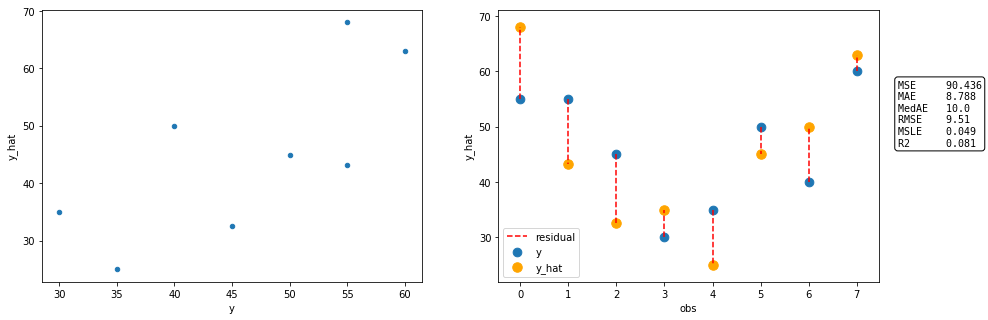

In [18]:
low_high = pd.DataFrame(
   [[55, 68], [55, 43.2], [45, 32.5], [30, 35], [35, 25], [50, 45],  [40, 50], [60, 63]],
   columns = ("y", "y_hat")
)


plot_scores(low_high, kind="line", residuals=True)

#### Case B: Model having high accurancy, but a one large residual between prediction $\hat{y}$ and observation $y$

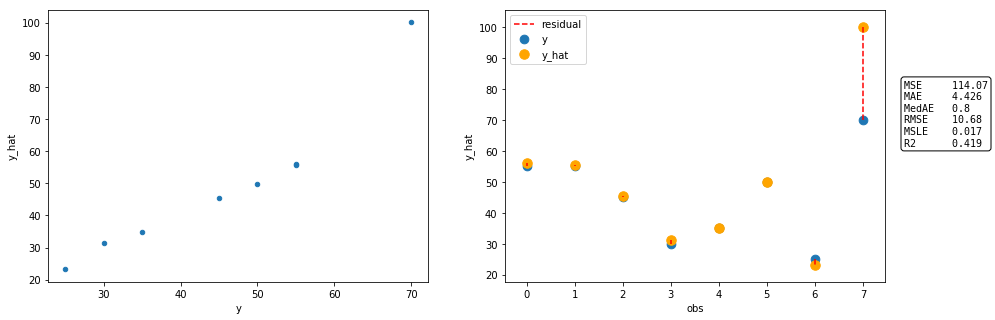

In [9]:
# Decent model, however with one large outlier
single_outlier = pd.DataFrame(
   [[55, 56], [55, 55.6], [45, 45.5], [30, 31.3], [35, 35], [50, 49.89],  [25, 23.2], [70, 100.1]],
   columns = ("y", "y_hat")
)
plot_scores(single_outlier, kind = "line", residuals = True)

#### Case C: Model having medicore accurancy

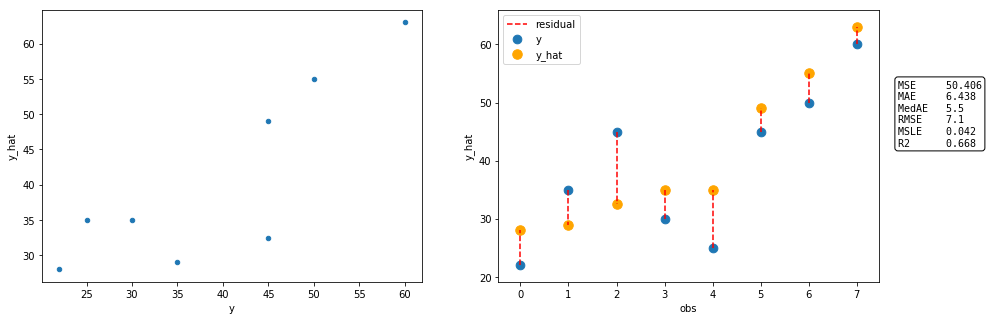

In [19]:
medium = pd.DataFrame(
   [[22, 28], [35, 29], [45, 32.5], [30, 35], [25, 35], [45, 49],[50, 55], [60, 63]],
   columns = ("y", "y_hat")
)
plot_scores(medium, kind = "line", residuals = True)

#### Case D: Model having mostly over-predicted values from observation

Why the negative $R^2$?

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

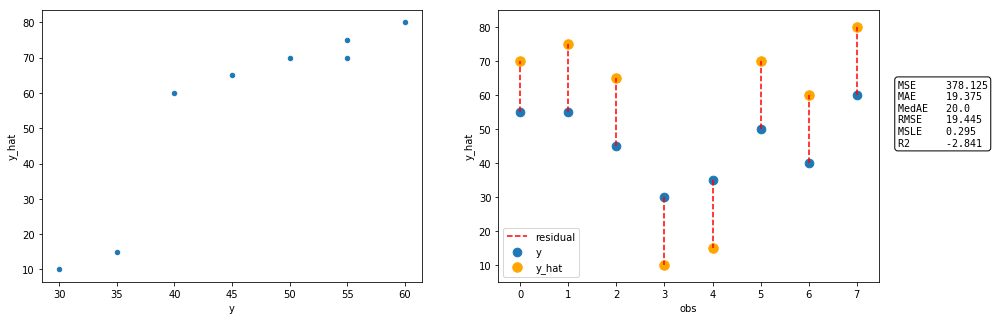

In [20]:
over_predicted = pd.DataFrame(
   [[55, 70], [55, 75], [45, 65], [30, 10], [35, 15], [50, 70],  [40, 60], [60, 80]],
   columns = ("y", "y_hat")
)
plot_scores(over_predicted, kind = "line", residuals = True)